# Task

Segment customers based on behavior to improve targeted marketing strategies using the file "customer_behavior_data.csv".

## Load data

### Subtask:
Load the customer behavior data into a dataframe.


**Reasoning**:
Import pandas and load the data into a DataFrame, then display the head to verify.



In [12]:
import pandas as pd

df = pd.read_csv('customer_behaviour_data.csv')
display(df.head())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data preprocessing

### Subtask:
Clean and prepare the data for segmentation. This may include handling missing values, scaling features, and encoding categorical variables.


**Reasoning**:
Check for missing values in the DataFrame.



In [13]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


**Reasoning**:
Identify and encode categorical columns, identify and scale numerical columns, and combine them into a single DataFrame.



In [15]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Identify categorical and numerical columns
categorical_features = ['Gender']
numerical_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Create transformers for scaling and encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

# Apply preprocessing
preprocessed_data = preprocessor.fit_transform(df)

# Create a DataFrame from the preprocessed data
# Get the column names after one-hot encoding
onehot_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(onehot_feature_names)

preprocessed_df = pd.DataFrame(preprocessed_data, columns=all_feature_names)

display(preprocessed_df.head())

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,-1.424569,-1.738999,-0.434801,0.0,1.0
1,-1.281035,-1.738999,1.195704,0.0,1.0
2,-1.352802,-1.700830,-1.715913,1.0,0.0
3,-1.137502,-1.700830,1.040418,1.0,0.0
4,-0.563369,-1.662660,-0.395980,1.0,0.0


## Feature engineering

### Subtask:
Create new features that capture relevant aspects of customer behavior, such as recency, frequency, and monetary value (RFM).


**Reasoning**:
Check the columns of the dataframe to determine if RFM features can be calculated.



In [16]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

## Segmentation

### Subtask:
Apply a clustering algorithm (e.g., k-means) to segment customers based on their behavioral features.


**Reasoning**:
Apply K-Means clustering to the preprocessed data and add the cluster labels to the DataFrame.



In [17]:
from sklearn.cluster import KMeans

# Instantiate KMeans with an initial guess of 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)

# Fit the model to the preprocessed data
kmeans.fit(preprocessed_df)

# Store the cluster labels
preprocessed_df['cluster'] = kmeans.labels_

display(preprocessed_df.head())

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,cluster
0,-1.424569,-1.738999,-0.434801,0.0,1.0,4
1,-1.281035,-1.738999,1.195704,0.0,1.0,2
2,-1.352802,-1.700830,-1.715913,1.0,0.0,4
3,-1.137502,-1.700830,1.040418,1.0,0.0,2
4,-0.563369,-1.662660,-0.395980,1.0,0.0,4


## Analyze segments

### Subtask:
Analyze the characteristics of each customer segment to understand their behavior and identify target groups for marketing strategies.


**Reasoning**:
Calculate the mean of original numerical features and the proportion of gender for each cluster.



In [9]:
# Merge original df and preprocessed df to get original numerical values and gender
df_with_clusters = pd.merge(df, preprocessed_df['cluster'], left_index=True, right_index=True)

# Calculate mean of original numerical features for each cluster
cluster_numerical_means = df_with_clusters.groupby('cluster')[numerical_features].mean()
print("Mean of numerical features per cluster:")
display(cluster_numerical_means)

# Calculate the proportion of each gender for each cluster
cluster_gender_proportions = df_with_clusters.groupby('cluster')['Gender'].value_counts(normalize=True).unstack(fill_value=0)
print("\nGender proportions per cluster:")
display(cluster_gender_proportions)

Mean of numerical features per cluster:


,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,
0,32.692308,86.538462,82.128205
1,55.551724,48.482759,41.775862
2,25.272727,25.727273,79.363636
3,41.264706,88.500000,16.764706
4,27.957447,50.000000,44.638298



Gender proportions per cluster:


Gender,Female,Male
cluster,,
0,0.538462,0.461538
1,0.568966,0.431034
2,0.590909,0.409091
3,0.411765,0.588235
4,0.659574,0.340426


## Develop marketing strategies

### Subtask:
Based on the analysis of customer segments, develop tailored marketing strategies for each segment.


**Reasoning**:
Based on the provided `cluster_numerical_means` and `cluster_gender_proportions` dataframes, I will describe each cluster's profile and then propose tailored marketing strategies with their rationale, covering steps 2, 3, and 4 of the instructions.



In [10]:
print("--- Customer Segment Profiles and Marketing Strategies ---")

# Describe Cluster 0
print("\nCluster 0:")
print(f"- Average Age: {cluster_numerical_means.loc[0, 'Age']:.2f}")
print(f"- Average Annual Income: ${cluster_numerical_means.loc[0, 'Annual Income (k$)']:.2f}k")
print(f"- Average Spending Score: {cluster_numerical_means.loc[0, 'Spending Score (1-100)']:.2f}")
print(f"- Gender Distribution: Female - {cluster_gender_proportions.loc[0, 'Female']:.2%}, Male - {cluster_gender_proportions.loc[0, 'Male']:.2%}")
print("Profile: This cluster has a moderate average age and the highest average annual income and spending score. Gender distribution is relatively balanced.")
print("Marketing Strategy: Focus on loyalty programs, exclusive offers, and premium product recommendations. Rationale: Their high income and spending suggest they are valuable customers likely to respond to rewards and high-end offerings.")

# Describe Cluster 1
print("\nCluster 1:")
print(f"- Average Age: {cluster_numerical_means.loc[1, 'Age']:.2f}")
print(f"- Average Annual Income: ${cluster_numerical_means.loc[1, 'Annual Income (k$)']:.2f}k")
print(f"- Average Spending Score: {cluster_numerical_means.loc[1, 'Spending Score (1-100)']:.2f}")
print(f"- Gender Distribution: Female - {cluster_gender_proportions.loc[1, 'Female']:.2%}, Male - {cluster_gender_proportions.loc[1, 'Male']:.2%}")
print("Profile: This cluster has the oldest average age, moderate income, and moderate spending scores. Gender distribution is relatively balanced with slightly more females.")
print("Marketing Strategy: Target with comfortable, practical products and focus on value and reliability. Consider channels like direct mail or email. Rationale: Their age suggests a preference for practicality and established communication methods.")

# Describe Cluster 2
print("\nCluster 2:")
print(f"- Average Age: {cluster_numerical_means.loc[2, 'Age']:.2f}")
print(f"- Average Annual Income: ${cluster_numerical_means.loc[2, 'Annual Income (k$)']:.2f}k")
print(f"- Average Spending Score: {cluster_numerical_means.loc[2, 'Spending Score (1-100)']:.2f}")
print(f"- Gender Distribution: Female - {cluster_gender_proportions.loc[2, 'Female']:.2%}, Male - {cluster_gender_proportions.loc[2, 'Male']:.2%}")
print("Profile: This cluster has the youngest average age, the lowest average annual income, and very high spending scores. Predominantly female.")
print("Marketing Strategy: Focus on trendy, affordable products and engage heavily on social media platforms. Consider influencer collaborations and interactive campaigns. Rationale: Their youth, high spending despite lower income, and female dominance suggest they are trend-driven and active on social media.")

# Describe Cluster 3
print("\nCluster 3:")
print(f"- Average Age: {cluster_numerical_means.loc[3, 'Age']:.2f}")
print(f"- Average Annual Income: ${cluster_numerical_means.loc[3, 'Annual Income (k$)']:.2f}k")
print(f"- Average Spending Score: {cluster_numerical_means.loc[3, 'Spending Score (1-100)']:.2f}")
print(f"- Gender Distribution: Female - {cluster_gender_proportions.loc[3, 'Female']:.2%}, Male - {cluster_gender_proportions.loc[3, 'Male']:.2%}")
print("Profile: This cluster has a moderate average age, high average annual income, and very low spending scores. Slightly more male.")
print("Marketing Strategy: Re-engagement campaigns focusing on value, potential benefits of products, and perhaps surveying to understand their low spending. Rationale: Their high income but low spending indicates they are either not interested or finding value elsewhere. Strategies should aim to understand and address this.")

# Describe Cluster 4
print("\nCluster 4:")
print(f"- Average Age: {cluster_numerical_means.loc[4, 'Age']:.2f}")
print(f"- Average Annual Income: ${cluster_numerical_means.loc[4, 'Annual Income (k$)']:.2f}k")
print(f"- Average Spending Score: {cluster_numerical_means.loc[4, 'Spending Score (1-100)']:.2f}")
print(f"- Gender Distribution: Female - {cluster_gender_proportions.loc[4, 'Female']:.2%}, Male - {cluster_gender_proportions.loc[4, 'Male']:.2%}")
print("Profile: This cluster has a young average age, moderate average annual income, and moderate spending scores. Predominantly female.")
print("Marketing Strategy: Target with a mix of value and trendy products. Utilize email marketing and social media. Rationale: Their age and moderate characteristics suggest a balanced approach using common digital marketing channels.")

--- Customer Segment Profiles and Marketing Strategies ---

Cluster 0:
- Average Age: 32.69
- Average Annual Income: $86.54k
- Average Spending Score: 82.13
- Gender Distribution: Female - 53.85%, Male - 46.15%
Profile: This cluster has a moderate average age and the highest average annual income and spending score. Gender distribution is relatively balanced.
Marketing Strategy: Focus on loyalty programs, exclusive offers, and premium product recommendations. Rationale: Their high income and spending suggest they are valuable customers likely to respond to rewards and high-end offerings.

Cluster 1:
- Average Age: 55.55
- Average Annual Income: $48.48k
- Average Spending Score: 41.78
- Gender Distribution: Female - 56.90%, Male - 43.10%
Profile: This cluster has the oldest average age, moderate income, and moderate spending scores. Gender distribution is relatively balanced with slightly more females.
Marketing Strategy: Target with comfortable, practical products and focus on value an

## Summary:

### Data Analysis Key Findings

*   The dataset <code> customer_behaviour_data.csv</code>  was successfully loaded and contained no missing values.
*   The available data included 'CustomerID', 'Gender', 'Age', 'Annual Income (k\$)', and 'Spending Score (1-100)'.
*   RFM (Recency, Frequency, Monetary) features could not be engineered due to the absence of transaction-level data (dates, identifiers, amounts).
*   Customer data was preprocessed by scaling numerical features ('Age', 'Annual Income (k\$)', 'Spending Score (1-100)') and one-hot encoding the categorical feature ('Gender').
*   K-Means clustering was applied to the preprocessed data, resulting in 5 distinct customer segments.
*   Analysis of the segments revealed distinct profiles based on average age, annual income, spending score, and gender distribution.
    *   Cluster 0: High Income, High Spending, balanced gender.
    *   Cluster 1: Older, Moderate Income, Moderate Spending, slightly more female.
    *   Cluster 2: Young, Low Income, High Spending, predominantly female.
    *   Cluster 3: High Income, Low Spending, slightly more male.
    *   Cluster 4: Young, Moderate Income, Moderate Spending, predominantly female.

### Insights or Next Steps

*   The identified customer segments provide a strong basis for developing targeted marketing campaigns, allowing for more personalized messaging and offers for each group.
*   To enhance future segmentation and marketing strategies, consider collecting transaction-level data to enable RFM analysis and potentially uncover different behavioral patterns.


# Visualize clusters

### Subtask:
Create 2D or 3D scatter plots to visualize the clusters, using different colors for each cluster.


**Reasoning**:
Create 2D and 3D scatter plots to visualize the clusters based on income, spending, and age.



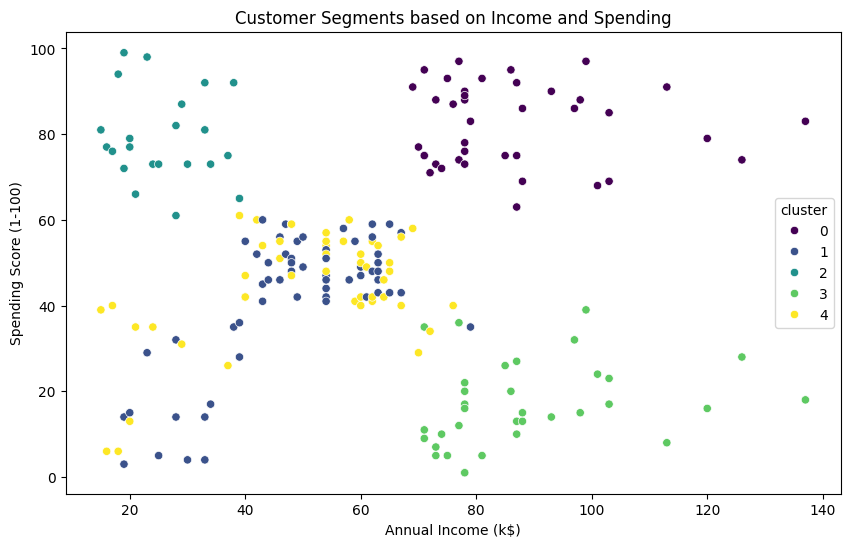

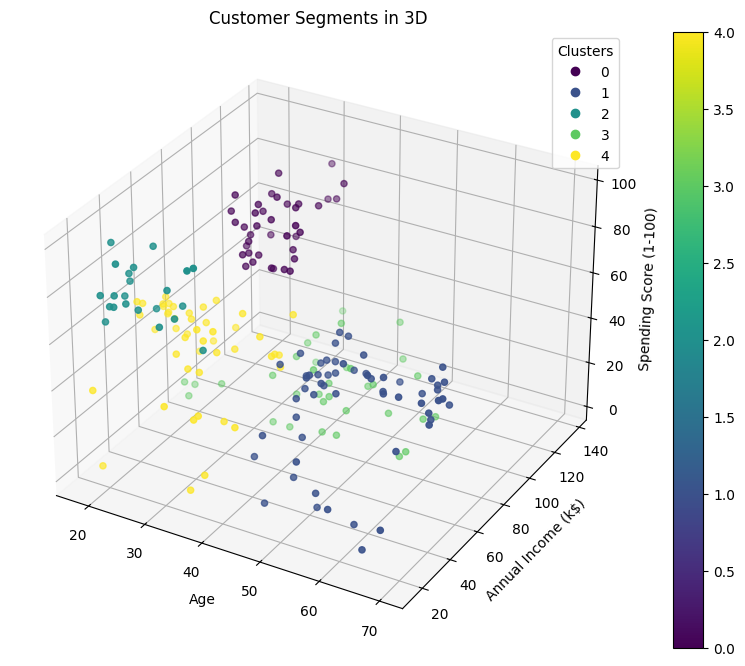

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# 2D Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', data=df_with_clusters, palette='viridis')
plt.title('Customer Segments based on Income and Spending')
plt.show()

# 3D Scatter Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_with_clusters['Age'], df_with_clusters['Annual Income (k$)'], df_with_clusters['Spending Score (1-100)'], c=df_with_clusters['cluster'], cmap='viridis')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('Customer Segments in 3D')

# Add a color bar
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
plt.colorbar(scatter)

plt.show()

## Summary:

### Data Analysis Key Findings

*   The visualization step successfully generated both 2D and 3D scatter plots, effectively representing the customer clusters.
*   The plots show customer segmentation based on 'Annual Income (k\$)', 'Spending Score (1-100)', and 'Age', with different colors distinguishing each cluster.

### Insights or Next Steps

*   Analyzing the visual separation and characteristics of each cluster in the plots can provide insights into the different customer segments' behaviors.
*   These visualizations can be used to inform targeted marketing strategies for each identified customer segment.
